## ACTD 2024 - 20

### Clases 13-14: redes neuronales para clasificación

- Redes densas
- Redes para clasificación
- Procesamiento de datos continuos y categóricos
- Funciones de activación y pérdida

Empecemos importando numpy, pandas, keras, tensorflow

In [16]:
!pip install tensorflow


In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [18]:
df = pd.read_csv('heart.csv')

Exploremos las primeras filas del dataframe.

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


Descripción de las variables:

https://archive.ics.uci.edu/dataset/45/heart+disease


Exploremos el tamaño del df

In [20]:
df.shape

(303, 14)

Identificamos NAs en los datos

In [21]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


ENTRENAMIENTO NUEVO MODELO

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7034 - loss: 3.1920 
Test accuracy: 0.6957
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Precision: 0.4615
Recall: 0.4615
F1 Score: 0.4615
Confusion Matrix:
[[26  7]
 [ 7  6]]


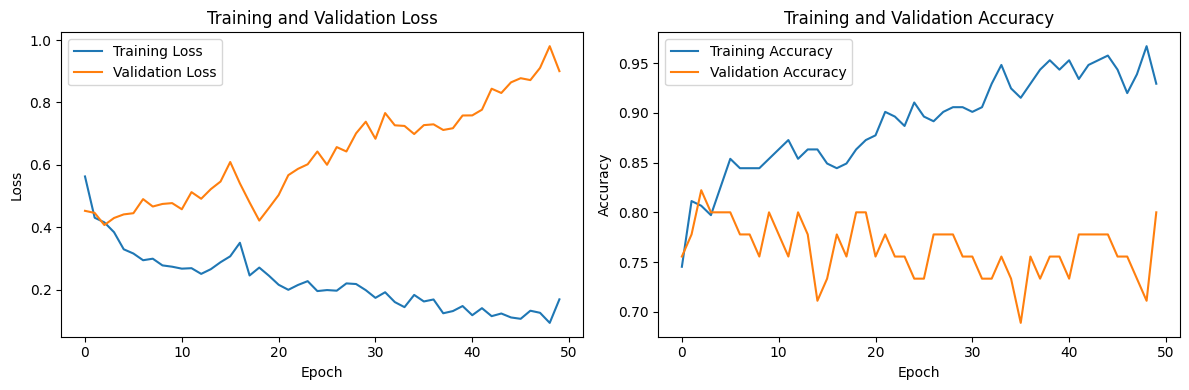

In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Cargar los datos
df = pd.read_csv('heart.csv')

# Seleccionar un subconjunto de variables
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach']

# Separar características y etiquetas
X = df[selected_features]
y = df['target']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar las características numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo base
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(len(selected_features),)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo con una tasa de aprendizaje específica

learning_rate = 0.1  # Cambia el valor según sea necesario
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])



# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), verbose=0)

# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Calcular métricas adicionales
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Graficar el historial de pérdida
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Definir las tasas de aprendizaje a probar
learning_rates = [0.001, 0.01, 0.1]  # Tasa base es usualmente 0.001

# Almacenar resultados
results = []

for lr in learning_rates:
    print(f"\nEntrenando modelo con tasa de aprendizaje: {lr}")

    # Crear el modelo
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', input_shape=(len(selected_features),)),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compilar el modelo con la tasa de aprendizaje actual
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val), verbose=0)

    # Evaluar el modelo
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
    print(f'Test accuracy: {test_accuracy:.4f}')

    # Calcular métricas adicionales
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = (y_pred > 0.5).astype(int)

    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)

    # Almacenar resultados
    results.append({
        'lr': lr,
        'history': history.history,
        'test_accuracy': test_accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    })

# Graficar el historial de pérdida y precisión para todos los modelos
plt.figure(figsize=(12, 8))
for result in results:
    plt.plot(result['history']['loss'], label=f'Training Loss (LR={result["lr"]})')
    plt.plot(result['history']['val_loss'], label=f'Validation Loss (LR={result["lr"]})')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
for result in results:
    plt.plot(result['history']['accuracy'], label=f'Training Accuracy (LR={result["lr"]})')
    plt.plot(result['history']['val_accuracy'], label=f'Validation Accuracy (LR={result["lr"]})')
plt.title('Training and Validation Accuracy for Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Imprimir resumen de resultados
print("\nResumen de resultados:")
for result in results:
    print(f"Learning Rate: {result['lr']}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print()


Entrenando modelo con tasa de aprendizaje: 0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7532 - loss: 0.4935 
Test accuracy: 0.7391
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Precision: 0.5556
Recall: 0.3846
F1 Score: 0.4545
Confusion Matrix:
[[29  4]
 [ 8  5]]

Entrenando modelo con tasa de aprendizaje: 0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7677 - loss: 0.7189 
Test accuracy: 0.7609
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Precision: 0.6000
Recall: 0.4615
F1 Score: 0.5217
Confusion Matrix:
[[29  4]
 [ 7  6]]

Entrenando modelo con tasa de aprendizaje: 0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Agregamos las listas de categorías

In [ ]:
model.fit(train_ds, epochs=50, validation_data=val_ds)